In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error,r2_score
from sklearn.model_selection import validation_curve, cross_val_score
from scipy import stats

### DATA FRAME 1


In [64]:
df1=pd.read_csv('Airsat21.csv') # read the csv file
df1.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [65]:
df1.dtypes # checking the data types

id                                     int64
Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_De

In [66]:
print(df1.columns) # checking the column names

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')


In [67]:
df1.describe() # describing the data 

,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8793.000000
mean,64909.453421,39.349824,1198.719732,2.732668,3.034835,2.754908,2.966186,3.202996,3.245092,3.404176,3.328946,3.361171,3.348009,3.615228,3.285260,3.625780,3.261092,14.811755,15.229728
std,37363.570738,15.125359,1002.278467,1.326181,1.523991,1.401340,1.281167,1.338942,1.348517,1.326445,1.339770,1.290675,1.311099,1.189311,1.272855,1.180865,1.318718,38.643242,39.026924
min,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32450.000000,27.000000,411.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,64666.000000,40.000000,853.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97335.000000,51.000000,1750.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,14.000000
max,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [68]:
df1.Gender.value_counts() # taking count of column values over here

Female    4495
Male      4318
Name: Gender, dtype: int64

In [69]:
df1.Customer_Type.value_counts()

Loyal Customer       7237
disloyal Customer    1576
Name: Customer_Type, dtype: int64

In [70]:
df1.Type_of_Travel.value_counts()

Business travel    6121
Personal Travel    2692
Name: Type_of_Travel, dtype: int64

In [71]:
df1.Class.value_counts()

Business    4261
Eco         3917
Eco Plus     635
Name: Class, dtype: int64

In [72]:
df1.satisfaction.value_counts()

neutral or dissatisfied    5010
satisfied                  3803
Name: satisfaction, dtype: int64

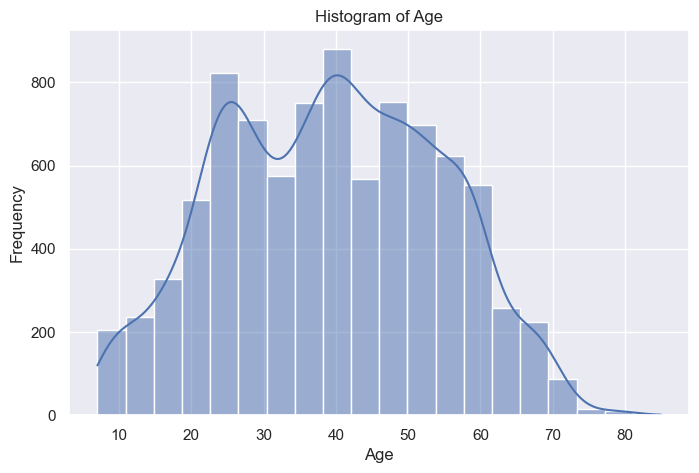

In [73]:
plt.figure(figsize=(8,5)) # univariate histogram
sns.histplot(df1['Age'], bins=20, kde=True, color='b')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()  # Shows age group of travellers

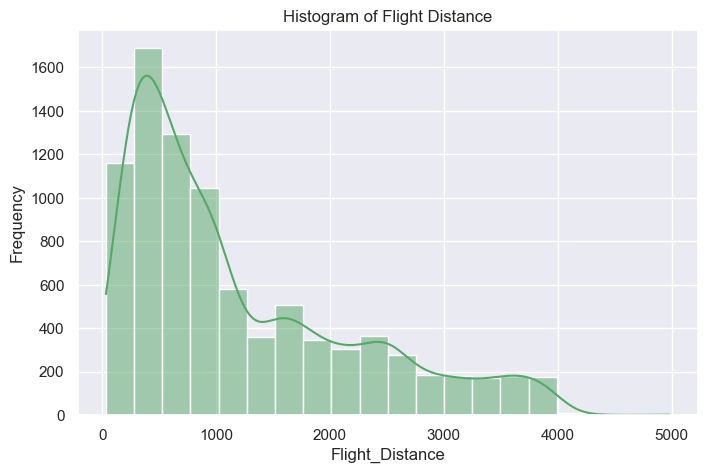

In [74]:
plt.figure(figsize=(8,5))
sns.histplot(df1['Flight_Distance'], bins=20, kde=True, color='g')
plt.title('Histogram of Flight Distance')
plt.xlabel('Flight_Distance')
plt.ylabel('Frequency')
plt.show()

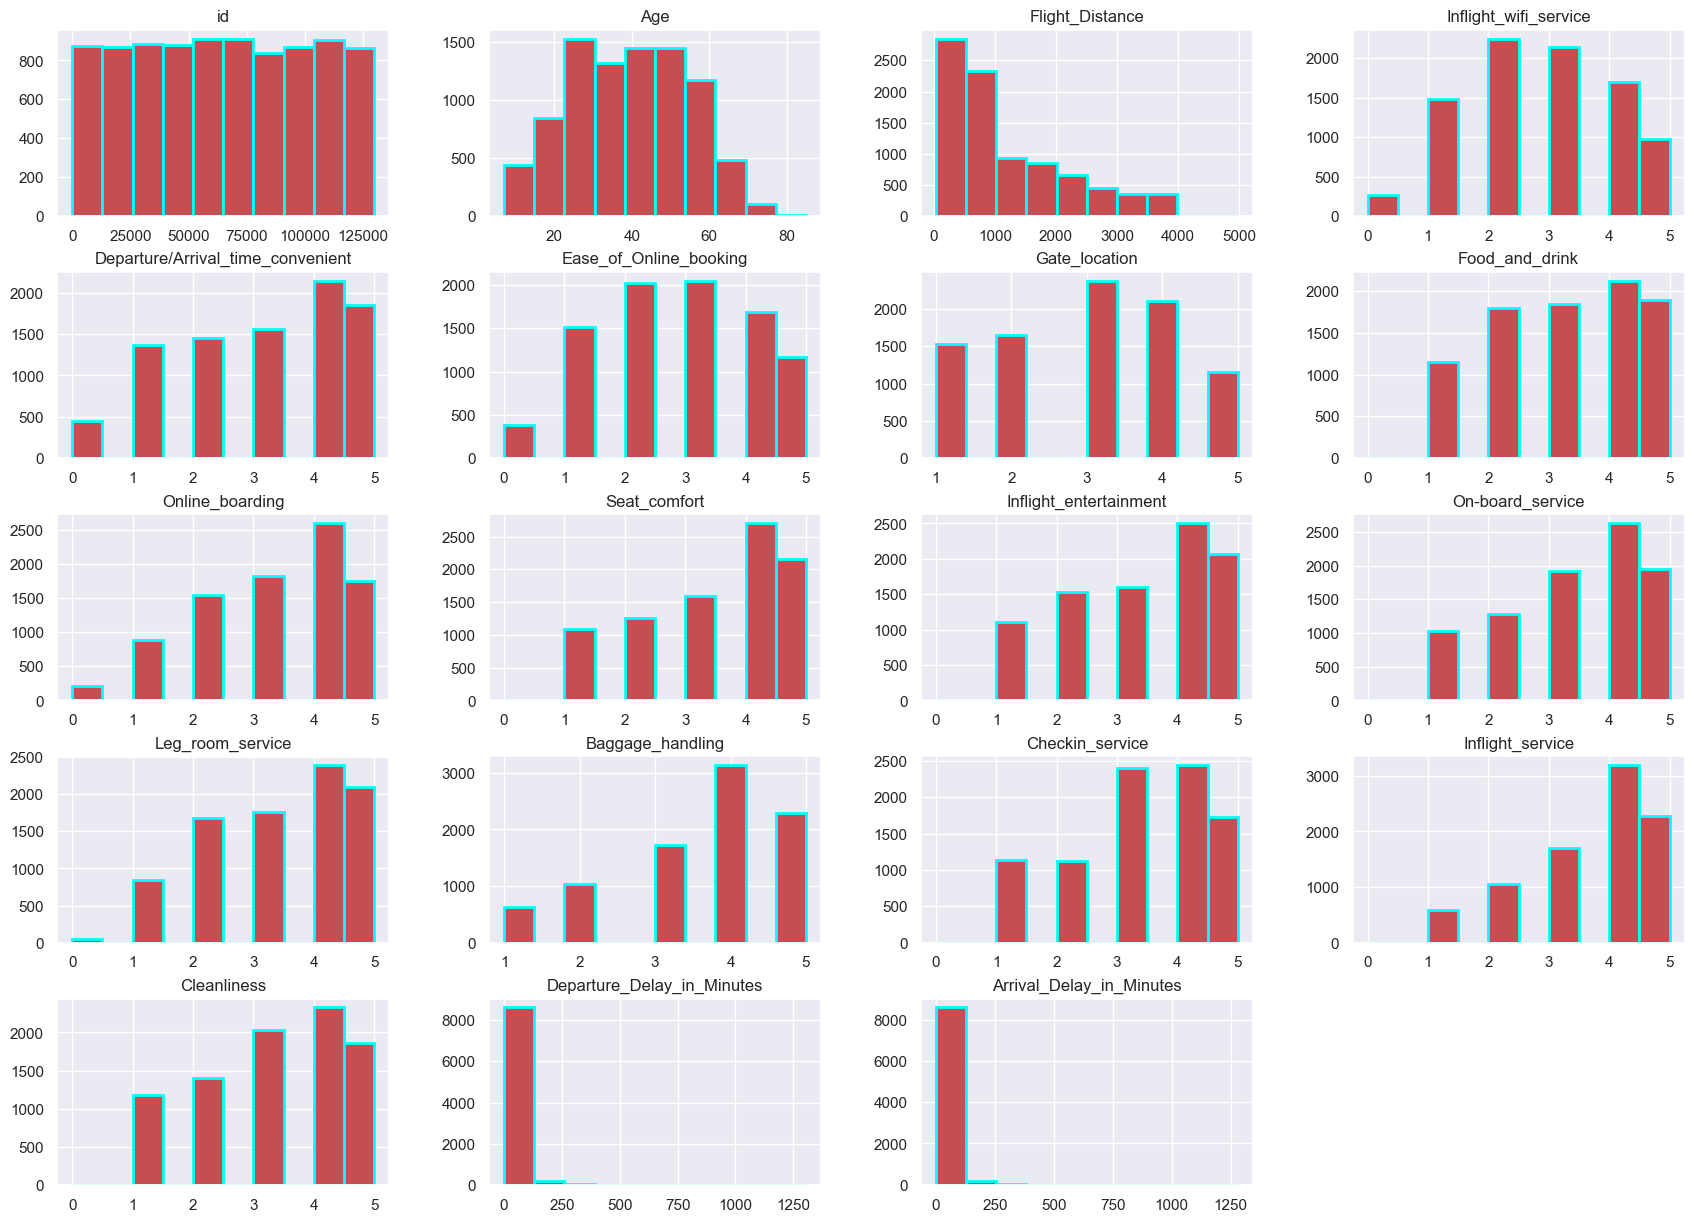

In [75]:
df1.hist(edgecolor='cyan',linewidth=2, color='r') # multiple histogram for the data available in the dataset
fig=plt.gcf()
fig.set_size_inches(21,15)
plt.show()

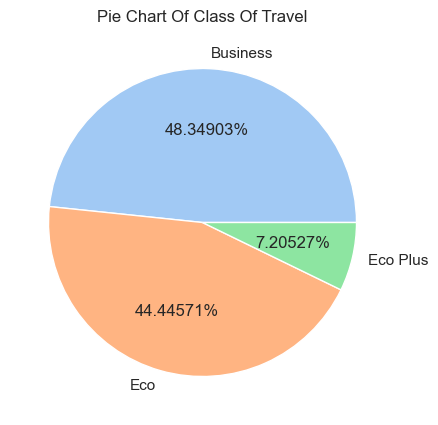

In [76]:
# pie chart
plt.figure(figsize=(8,5))
df1['Class'].value_counts().plot(kind='pie',autopct='%1.5f%%',colors=sns.color_palette('pastel'))
plt.title('Pie Chart Of Class Of Travel')
plt.ylabel('')
plt.show()

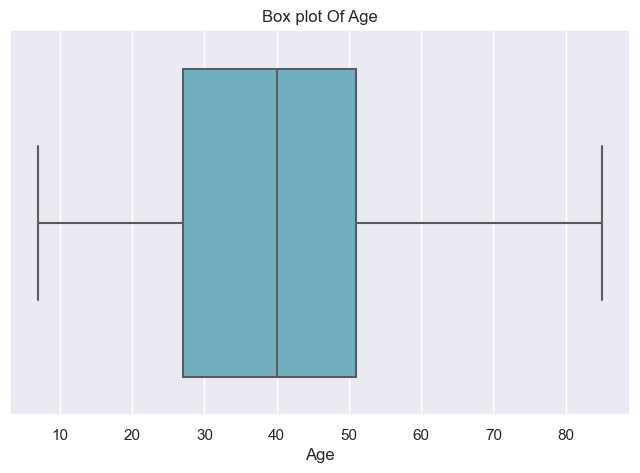

In [77]:
plt.figure(figsize=(8,5) ) # univariate box plot
sns.boxplot(x=df1['Age'],color='c')
plt.title('Box plot Of Age')
plt.xlabel('Age')
plt.show()

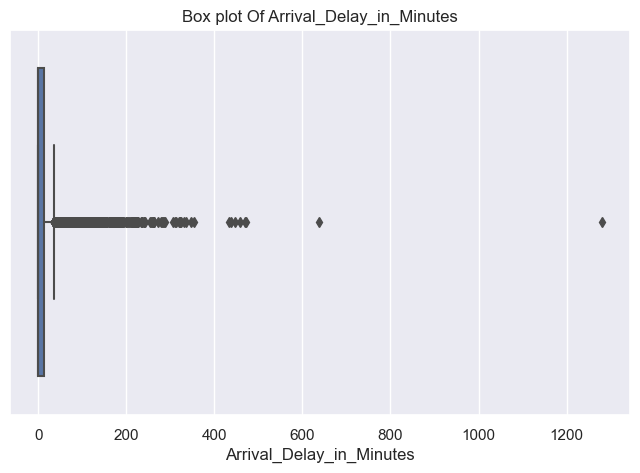

In [78]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df1['Arrival_Delay_in_Minutes'])
plt.title('Box plot Of Arrival_Delay_in_Minutes')
plt.xlabel('Arrival_Delay_in_Minutes')
plt.show()

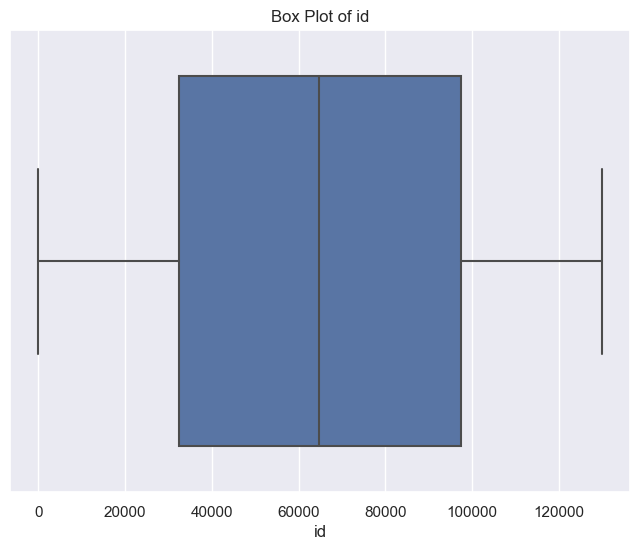

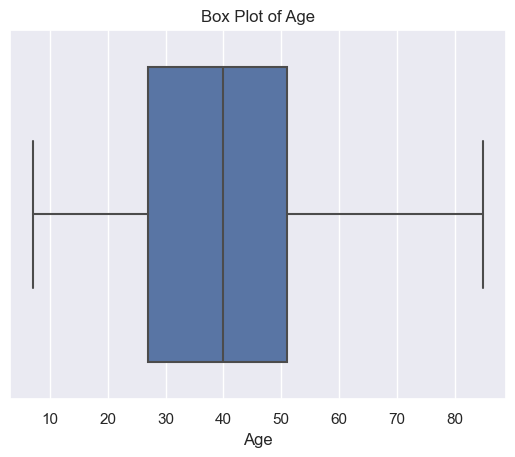

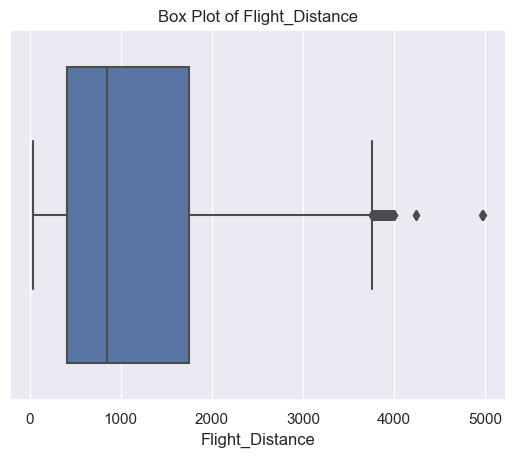

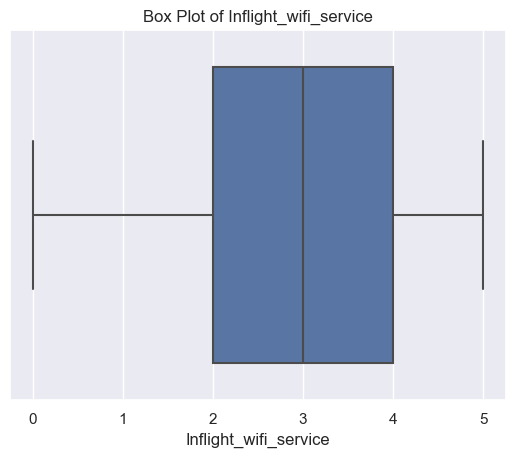

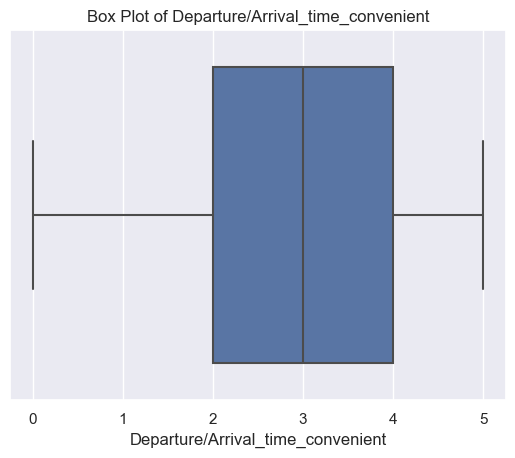

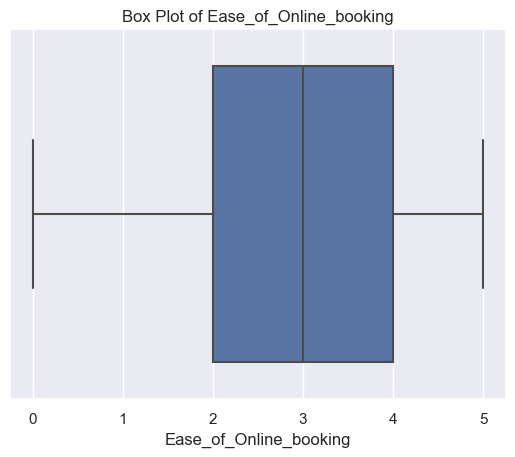

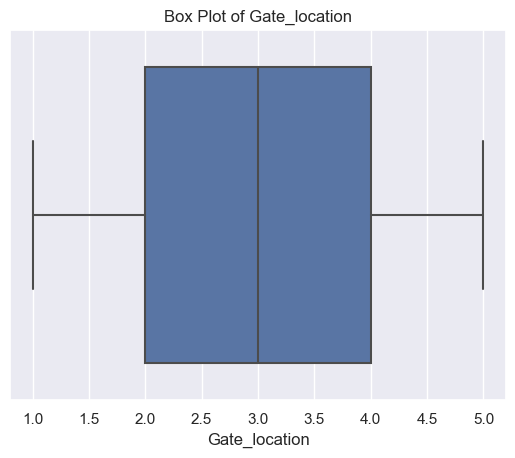

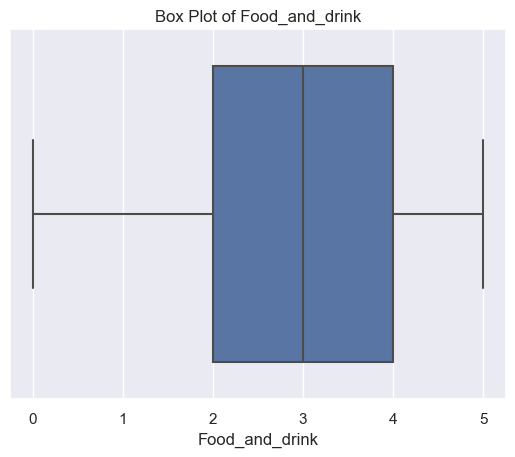

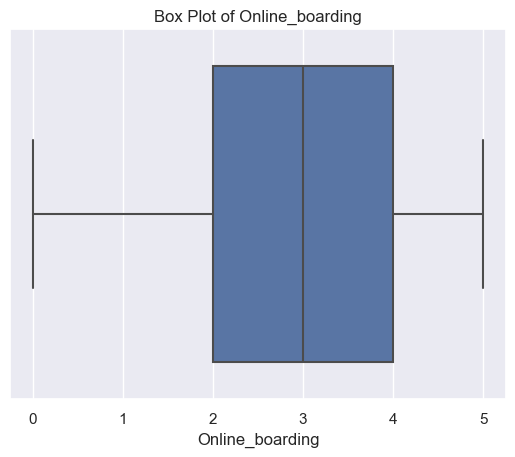

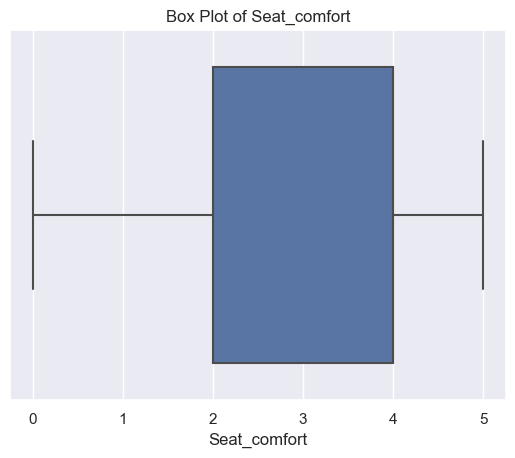

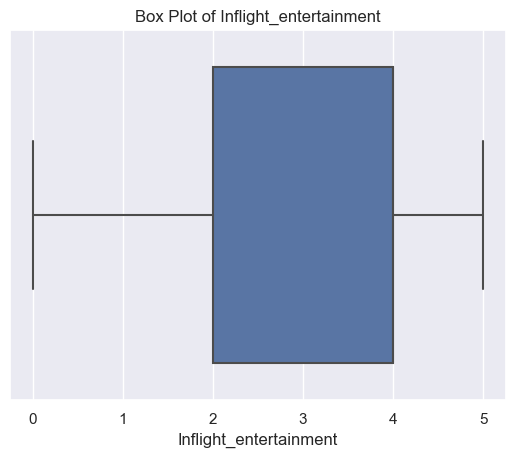

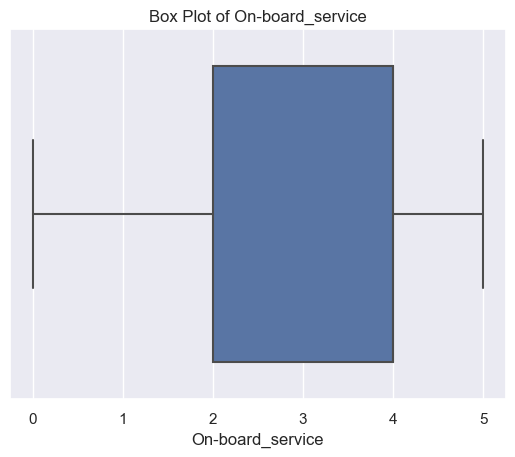

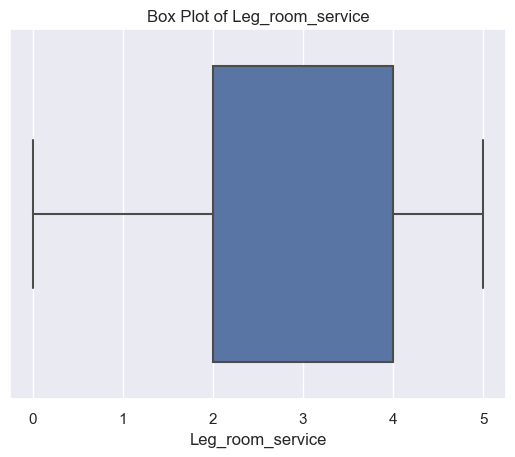

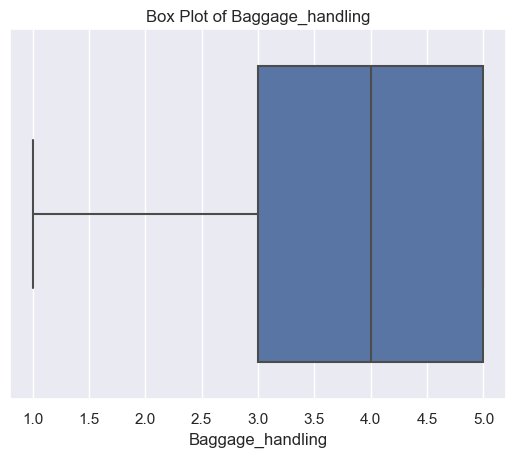

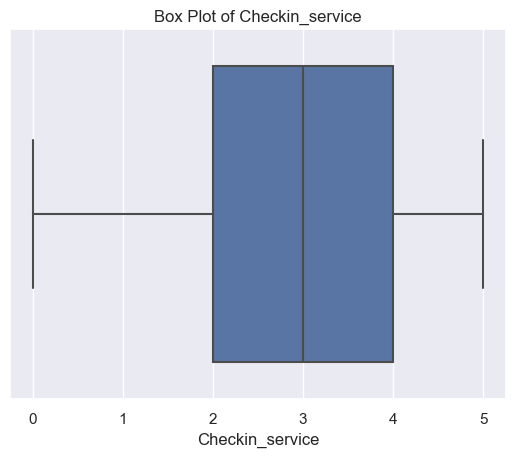

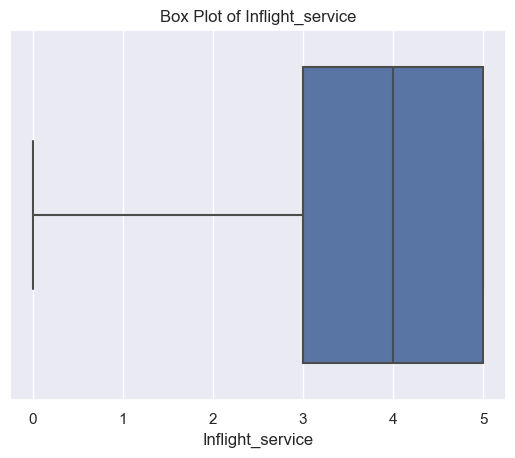

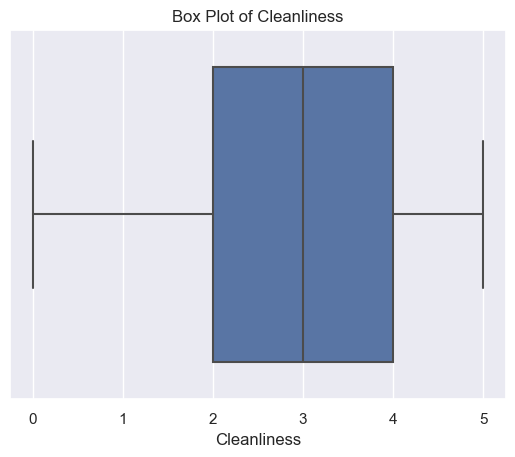

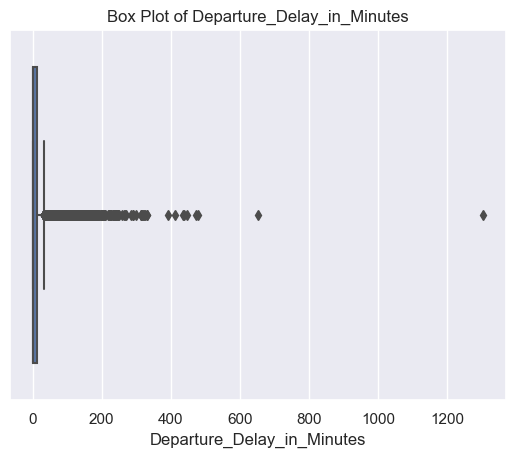

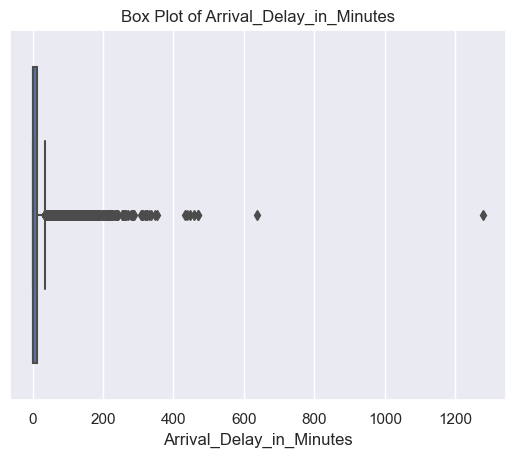

In [79]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
# Iterate through each numeric column and create a box plot
for column in df1.select_dtypes(include=['number']): 
    sns.boxplot(x=df1[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

<Axes: xlabel='Age', ylabel='Flight_Distance'>

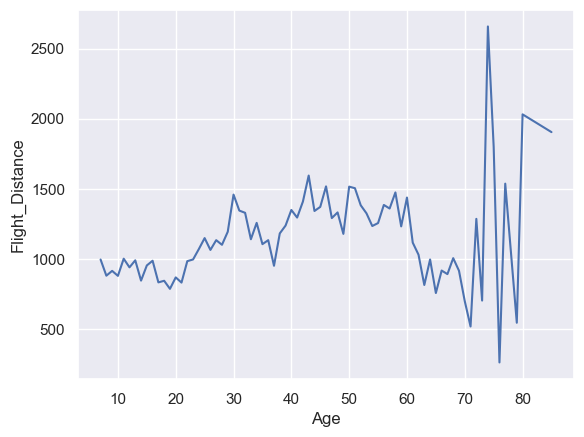

In [80]:
sns.lineplot(x='Age',y='Flight_Distance',data=df1, errorbar=None) # shows the relation between age and distance

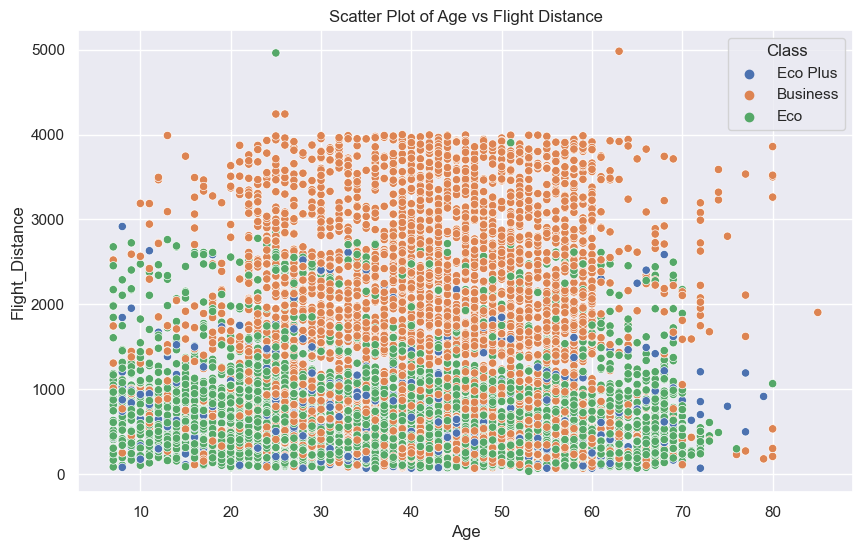

In [81]:
# Bivariate Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Flight_Distance', hue='Class', data=df1)
plt.title('Scatter Plot of Age vs Flight Distance')
plt.xlabel('Age')
plt.ylabel('Flight_Distance')
plt.legend(title='Class')
plt.show()

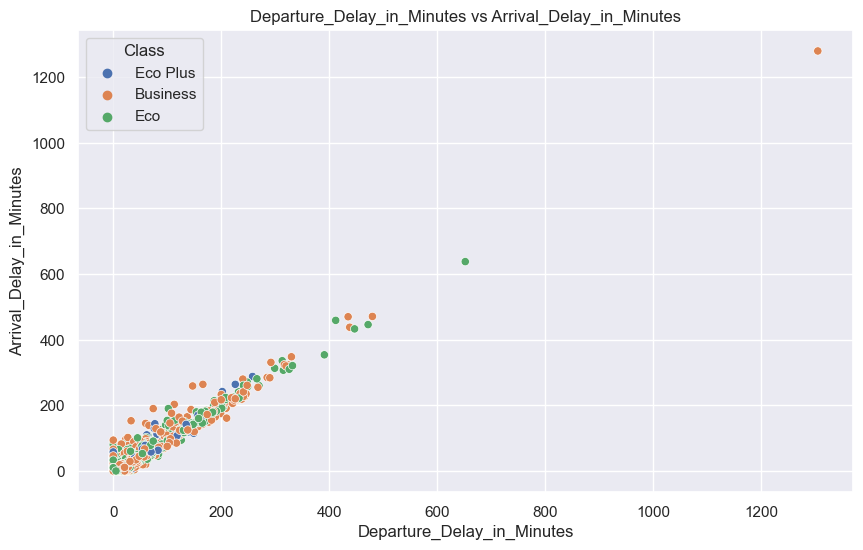

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Departure_Delay_in_Minutes', y='Arrival_Delay_in_Minutes', hue='Class', data=df1)
plt.title('Departure_Delay_in_Minutes vs Arrival_Delay_in_Minutes')
plt.xlabel('Departure_Delay_in_Minutes')
plt.ylabel('Arrival_Delay_in_Minutes')
plt.legend(title='Class')
plt.show() # shows the relation between departure and arrival delays with respect to class of travel

### DATA PREPROCESSING

In [83]:
df1= df1.drop(columns=['id','Inflight_wifi_service','Ease_of_Online_booking','Gate_location','Food_and_drink','Online_boarding','Seat_comfort','Inflight_entertainment','On-board_service','Leg_room_service','Baggage_handling','Checkin_service','Inflight_service','Cleanliness','Class','Gender','Customer_Type','satisfaction'])
df1    # dropping unnecessary columns                   

,Age,Type_of_Travel,Flight_Distance,Departure/Arrival_time_convenient,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,13,Personal Travel,460,4,25,18.0
1,25,Business travel,235,2,1,6.0
2,26,Business travel,1142,2,0,0.0
3,25,Business travel,562,5,11,9.0
4,61,Business travel,214,3,0,0.0
...,...,...,...,...,...,...
8808,25,Business travel,3716,5,0,0.0
8809,25,Personal Travel,311,4,0,10.0
8810,25,Business travel,646,3,5,0.0
8811,42,Business travel,3512,3,21,11.0


In [84]:
df1.shape # checking the shape of the column

(8813, 6)

In [85]:
df1=df1.dropna() #droping the null values
df1.shape

(8793, 6)

In [86]:
df1_num = df1.select_dtypes(include='number')
df1_num.head() 

,Age,Flight_Distance,Departure/Arrival_time_convenient,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,13,460,4,25,18.0
1,25,235,2,1,6.0
2,26,1142,2,0,0.0
3,25,562,5,11,9.0
4,61,214,3,0,0.0


In [110]:
# Outlier Filter
Q1= df1_num.quantile(0.25)
Q3= df1_num.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [111]:
lower_bound

Age                                    -9.0
Flight_Distance                     -1600.0
Departure/Arrival_time_convenient      -1.0
Departure_Delay_in_Minutes            -19.5
Arrival_Delay_in_Minutes              -21.0
dtype: float64

In [112]:
upper_bound

Age                                    87.0
Flight_Distance                      3760.0
Departure/Arrival_time_convenient       7.0
Departure_Delay_in_Minutes             32.5
Arrival_Delay_in_Minutes               35.0
dtype: float64

C:\Users\Anmol\AppData\Local\Temp\ipykernel_15868\3712028824.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[~((df1_num < lower_bound) | (df1_num > upper_bound)).any(axis=1)] # removing the outliers


<Axes: xlabel='Flight_Distance'>

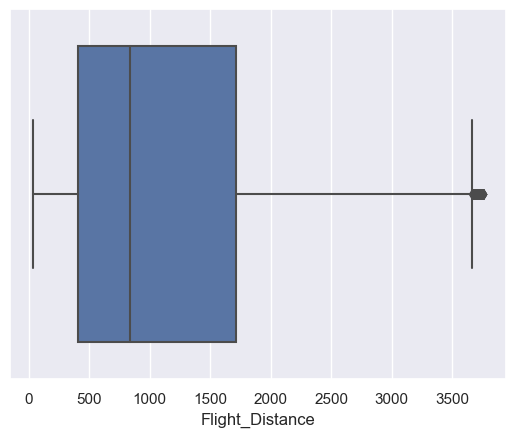

In [115]:
df1 = df1[~((df1_num < lower_bound) | (df1_num > upper_bound)).any(axis=1)] # removing the outliers
sns.boxplot(x=df1['Flight_Distance']) # the outlier is kept as it will not affect the final result too much

In [136]:
X = df1.drop('Flight_Distance', axis=1)
y = df1.Flight_Distance  
X.head() # moving numeric values to x and label to y

,Age,Type_of_Travel,Departure/Arrival_time_convenient,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,13,Personal Travel,4,25,18.0
1,25,Business travel,2,1,6.0
2,26,Business travel,2,0,0.0
3,25,Business travel,5,11,9.0
4,61,Business travel,3,0,0.0


In [137]:
X_num = X.select_dtypes('number')
X_num.head()

,Age,Departure/Arrival_time_convenient,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,13,4,25,18.0
1,25,2,1,6.0
2,26,2,0,0.0
3,25,5,11,9.0
4,61,3,0,0.0


In [138]:
X_cat = X.select_dtypes('object')
X_cat.head()

,Type_of_Travel
0,Personal Travel
1,Business travel
2,Business travel
3,Business travel
4,Business travel


In [139]:
# Rescaling Numeric Columns
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)
type(X_num_scaled)

numpy.ndarray

In [140]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)  # Converting the array to dataframe

In [141]:
X_num_scaled.describe()

,Age,Departure/Arrival_time_convenient,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,7321.000000,7321.000000,7321.000000,7321.000000
mean,0.415662,0.607759,0.119092,0.113095
std,0.195113,0.304905,0.226974,0.211020
min,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.400000,0.000000,0.000000
50%,0.423077,0.600000,0.000000,0.000000
75%,0.564103,0.800000,0.125000,0.142857
max,1.000000,1.000000,1.000000,1.000000


In [142]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int) # one hot encoding

In [143]:
X_cat_encoded.describe()

,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel
count,7321.000000,7321.000000
mean,0.686245,0.313755
std,0.464050,0.464050
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [144]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1) # Merging data_num and data_cat into X

In [145]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((7321, 6), (7321, 4), (7321, 2))

In [146]:
print(X.isnull().sum()) # checking for null values
print(y.isnull().sum())
print(X.shape)
print(y.shape)

Age                                  0
Departure/Arrival_time_convenient    0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
Type_of_Travel_Business travel       0
Type_of_Travel_Personal Travel       0
dtype: int64
0
(7321, 6)
(7321,)


In [147]:
X.describe() # describing the new encoded dataset

,Age,Departure/Arrival_time_convenient,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel
count,7321.000000,7321.000000,7321.000000,7321.000000,7321.000000,7321.000000
mean,0.415662,0.607759,0.119092,0.113095,0.686245,0.313755
std,0.195113,0.304905,0.226974,0.211020,0.464050,0.464050
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.400000,0.000000,0.000000,0.000000,0.000000
50%,0.423077,0.600000,0.000000,0.000000,1.000000,0.000000
75%,0.564103,0.800000,0.125000,0.142857,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
print("X train:",X_train.shape)
print("X test:",X_test.shape)
print("Y train:",y_train.shape) 
print("Y test:",y_test.shape)  # test-train split

X train: (5124, 6)
X test: (2197, 6)
Y train: (5124,)
Y test: (2197,)


In [149]:
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
import warnings

In [150]:
def find_mape(y,y_pred):
    return np.mean(((np.abs(y-y_pred)/y)))

In [151]:
def test_holdout(k_list,X_train, X_test, y_train, y_test):
    train_mape_scores=[]
    test_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_train_pred = knn.predict(X_train)
        train_mape = find_mape(y_train, y_train_pred)
        train_mape_scores.append(train_mape)
        y_test_pred = knn.predict(X_test)
        test_mape = find_mape(y_test,y_test_pred)
        test_mape_scores.append(test_mape)
    best_k = k_list[np.argmin(test_mape_scores)]
    
    return best_k,train_mape_scores,test_mape_scores

In [152]:
def cross_validation(X,y):
    cv_mape_scores=[]
    best_k_CV=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        cv_scores = -cross_val_score(knn,X,y,cv=5,scoring='neg_mean_absolute_percentage_error')
        print("for k = {}, cv_scores = {}".format(k,cv_scores))
        cv_mape = np.mean(cv_scores)
        cv_mape_scores.append(cv_mape)
   
    return best_k_CV,cv_mape_scores

In [153]:
#validate_hold_out(X_train,X_test,y_train,y_test)
k_list=np.arange(1,10,2)

best_k,train_mape_scores,test_mape_scores = test_holdout(k_list,X_train,X_test,y_train,y_test)

best_k_CV,cv_mape_scores= cross_validation(X,y)

for k = 1, cv_scores = [1.522561   1.64292925 1.6413904  1.5878989  1.73880079]
for k = 3, cv_scores = [1.44955161 1.51398606 1.47901828 1.5054397  1.59250074]
for k = 5, cv_scores = [1.42337209 1.46458715 1.42437992 1.47655999 1.53007211]
for k = 7, cv_scores = [1.38785091 1.45553006 1.4226793  1.4224144  1.48911598]
for k = 9, cv_scores = [1.38284216 1.44477285 1.42525523 1.40026188 1.47593819]


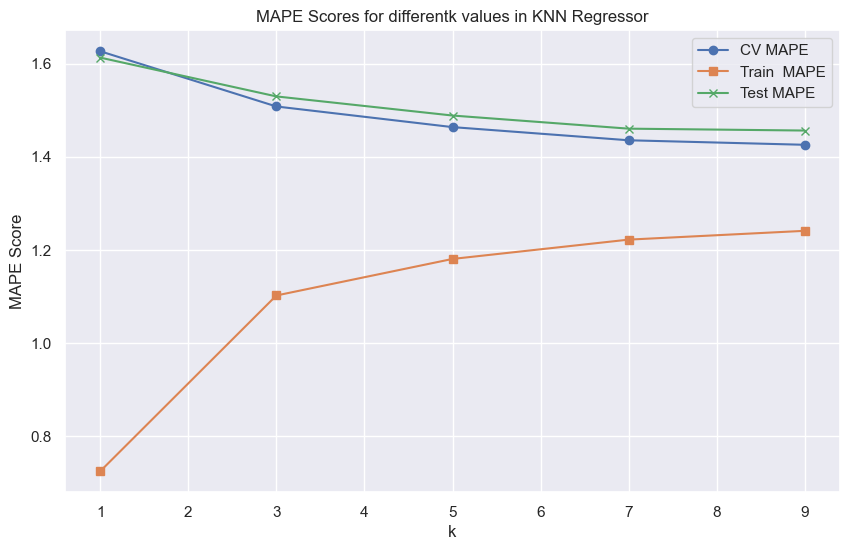

9
The best K value for CV is 9.


In [154]:
#plot CV MAPE, Train MAPE, Test MAPE for different values of K
plt.figure(figsize=(10,6))
plt.plot(k_list,cv_mape_scores,label='CV MAPE', marker='o')
plt.plot(k_list,train_mape_scores,label='Train  MAPE', marker='s')
plt.plot(k_list,test_mape_scores,label='Test MAPE', marker='x')
plt.xlabel('k')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for differentk values in KNN Regressor')
plt.legend()
plt.grid(True)
plt.show()

# Compare the best K value for CV
best_k_CV = k_list[np.argmin(cv_mape_scores)]
best_k = k_list[test_mape_scores.index(min(test_mape_scores))]
print(best_k)
print(f"The best K value for CV is {best_k_CV}.")